In [12]:
from mne_bids import make_bids_basename
from pathlib import Path, PurePath
from mne.time_frequency import (tfr_multitaper, tfr_stockwell, tfr_morlet,
                                tfr_array_morlet)
from mne.time_frequency import csd_fourier, csd_multitaper, csd_morlet

import seaborn
import helper
import mne
import os
import matplotlib.pyplot as plt
import pandas as pd
import matlab.engine
import numpy as np
import scipy as sp
import scipy.io
pd.options.display.html.table_schema = True
pd.options.display.max_rows = None
from mne.time_frequency import psd_multitaper
%matplotlib 

Using matplotlib backend: Qt5Agg


In [18]:
# Data set parameter
cfsubdir = Path('~','CIFAR_data','iEEG_10','subjects', subid, 'EEGLAB_datasets', 'bipolar_montage').expanduser()
proc = 'BP'
subid = 'JuRo'
bad_chan = ['OSAT', 'PR', 'ECG', 'TRIG', 'Event', 'RDh1-RDh6', 'RIa1-RIa2', 'RDh2-RDh6','RPs1-RPs2']
picks = ['RTo9-RTo10',  'RTo7-RTo8', 'RO1-RO2', 'RIp9-RIp10', 'RFp5-RFp6', 'RIa5-RIa6', 'RIa11-RIa12', 'RFPs9-RFPs10', 'RTp5-RTp6']

# Define EEG bands
eeg_bands = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}
bands = ['Delta', 'Theta','Alpha','Beta', 'Gamma']
ticks = [0.5, 4, 8, 12,30]

# Temporal paremeters
chunk = 20 # size of event from annotation partition
tmin = -0.2 # epoch starting time before event
tmax = 10 # end time of epoch before event
nepochs = 1 # number of epochs to display

# Paramters analysis
chan = 'RTo7-RTo8'
l_freq = 0.5
h_freq = 4

In [16]:
fdataset = helper.CIFAR_filename(subid=subid, task='sleep', suffix='_annotated_2_raw.fif')
fpath = cfsubdir.joinpath(fdataset)
fpath = os.fspath(fpath)
raw_annot = mne.io.read_raw_fif(fpath)

Opening raw data file /home/guime/CIFAR_data/iEEG_10/subjects/JuRo/EEGLAB_datasets/bipolar_montage/JuRo_freerecall_sleep_preprocessed_annotated_2_raw.fif...
    Range : 0 ... 6088056 =      0.000 ... 12176.112 secs
Ready.


In [ ]:
#raw_annot.plot(duration=300, n_channels=70, scalings=4e-4, color='b', butterfly=False)

In [21]:
events, events_dict = mne.events_from_annotations(raw_annot, chunk_duration=chunk)
print(events_dict)
epochs = mne.Epochs(raw_annot, events, tmin=tmin, tmax=tmax, 
                    event_repeated='drop')

Used Annotations descriptions: ['boundary', 'stage 1', 'stage 1b', 'stage 2', 'stage 3', 'stage 4', 'stage 4b', 'stage 5', 'transition 1', 'transition 2', 'transition 3', 'transition 4']
{'boundary': 1, 'stage 1': 2, 'stage 1b': 3, 'stage 2': 4, 'stage 3': 5, 'stage 4': 6, 'stage 4b': 7, 'stage 5': 8, 'transition 1': 9, 'transition 2': 10, 'transition 3': 11, 'transition 4': 12}
164 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [22]:
for istage in range(2,9):
    epoch_stage =  epochs[f'{istage}'].load_data()
    epoch_chan = epoch_stage.pick_channels(ch_names=[chan])
    psds, freqs = psd_multitaper(epoch_chan, low_bias=True)
    psds = 10 * np.log10(psds)
    psds_mean = psds.mean(0).mean(0)
    plt.plot(freqs, psds_mean, label=f'{istage}')
    plt.xscale('log')
    plt.xlim(xmin=0.5, xmax=50)
    plt.legend()
    
plt.title(f'psd {subid} channel RTo7-RTo8 (V2) sleep stages, averaged over 12 epochs of 10 seconds')
plt.xlabel('Frequency (Hz, log scale)')
plt.ylabel('Power (dB)')
plt.xticks(ticks, bands)

Loading data for 12 events and 5101 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 13 events and 5101 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 12 events and 5101 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 13 events and 5101 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 13 events and 5101 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 13 events and 5101 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 11 events and 5101 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows

([<matplotlib.axis.XTick at 0x7fee991db750>,
 <a list of 5 Text xticklabel objects>)

In [34]:
# Plot in time 
istage = '2'
epoch_stage =  epochs[istage].load_data()
fig = epoch_stage.plot(picks=chan , n_epochs=1, scalings=8e-5)

Loading data for 12 events and 5101 original time points ...
0 bad epochs dropped


In [35]:
fig.savefig('JuRo_epoch_NREM_sleep.png')

Dropped 0 epochs
Channels marked as bad: ['OSAT', 'PR', 'ECG', 'TRIG', 'Event', 'RDh1-RDh6', 'RIa1-RIa2', 'RDh2-RDh6', 'RPs1-RPs2']
Dropped 0 epochs
Channels marked as bad: ['OSAT', 'PR', 'ECG', 'TRIG', 'Event', 'RDh1-RDh6', 'RIa1-RIa2', 'RDh2-RDh6', 'RPs1-RPs2']
Dropped 0 epochs
Channels marked as bad: ['OSAT', 'PR', 'ECG', 'TRIG', 'Event', 'RDh1-RDh6', 'RIa1-RIa2', 'RDh2-RDh6', 'RPs1-RPs2']


Loading data for 13 events and 5101 original time points ...
0 bad epochs dropped
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 3301 samples (6.602 sec)



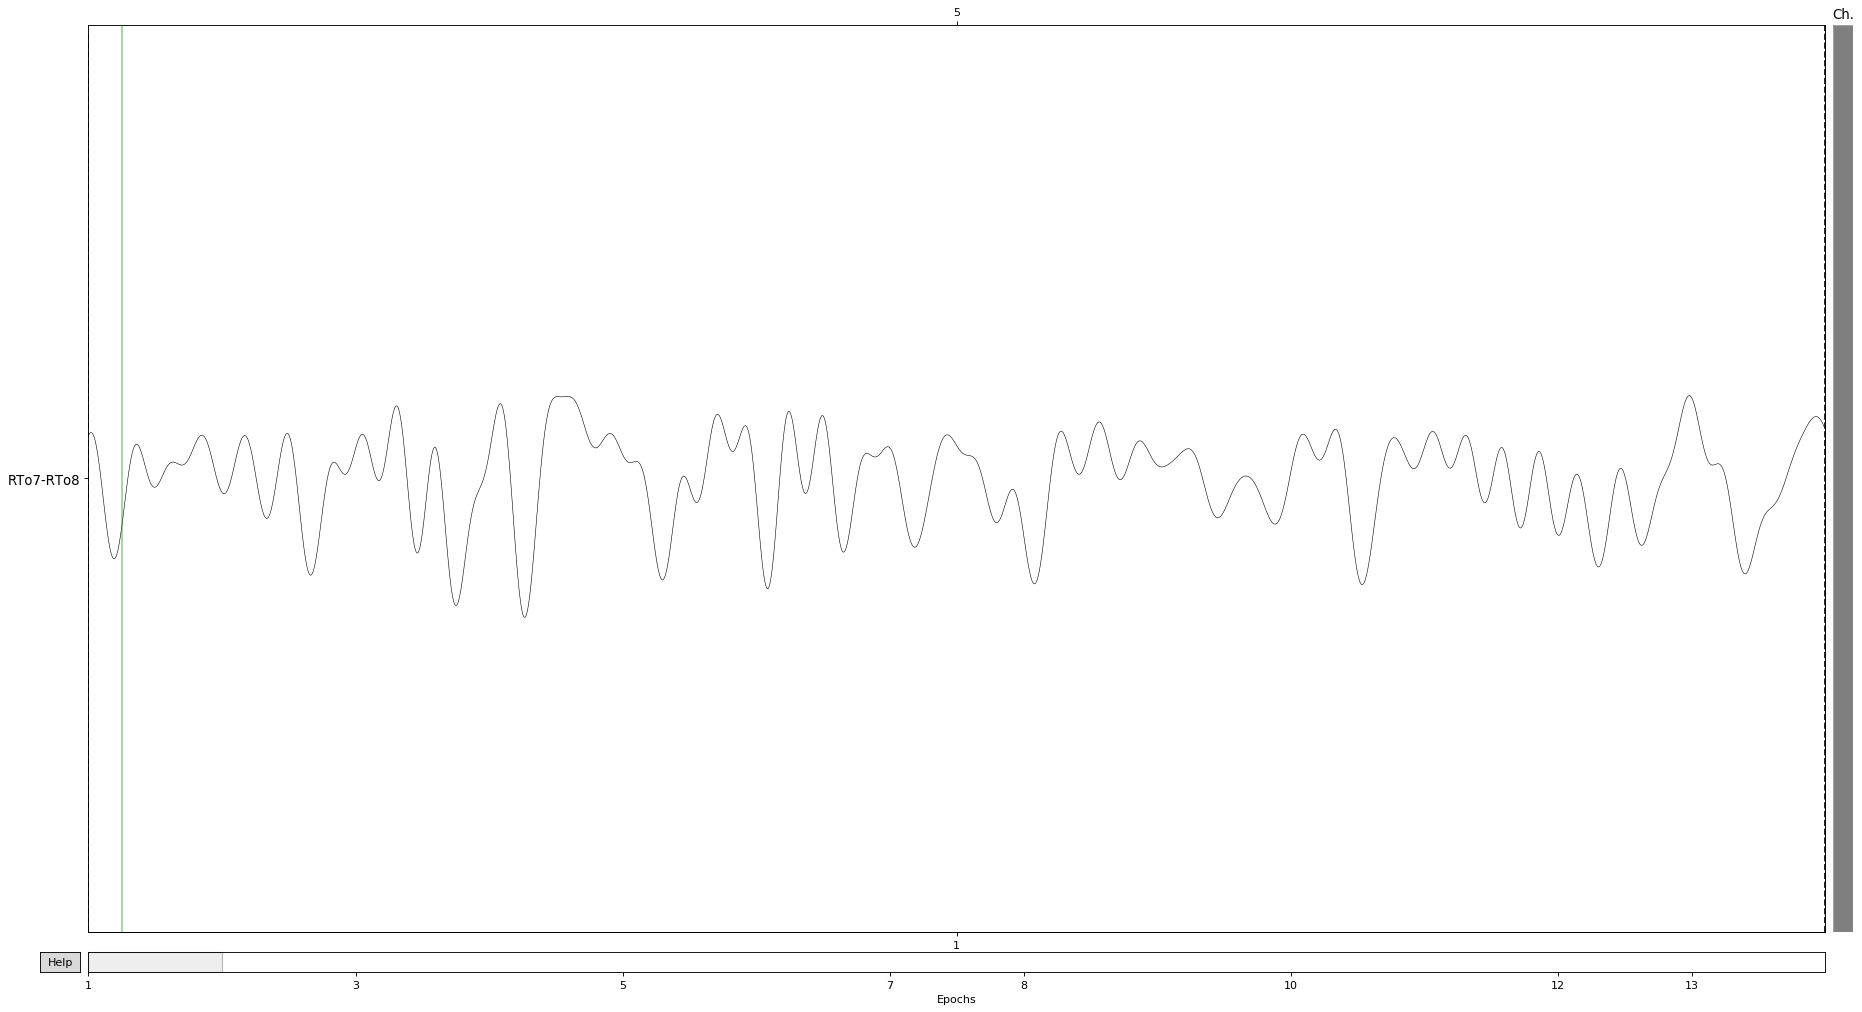

Dropped 0 epochs
Channels marked as bad: ['OSAT', 'PR', 'ECG', 'TRIG', 'Event', 'RDh1-RDh6', 'RIa1-RIa2', 'RDh2-RDh6', 'RPs1-RPs2']


In [25]:
# Filter
epochs_filt = epochs[istage].load_data().copy().filter(l_freq=l_freq, h_freq=h_freq, picks='RTo7-RTo8',)
epochs_filt.plot(picks=chan , n_epochs=1, scalings=8e-5)

In [ ]:
# Hilbert
